In [7]:
import pandas as pd
import numpy as np

user_data = pd.read_csv('./data/dataset.csv', dtype={
        "smoking_habit": "category",
        "industry_status": "category",
        "employer_tier": "category",
        "employment_nature": "category",
        "travel_requirement": "category",
        "work_hazard": "category",
        "institute": "category",
        "degree": "category",
        "field_of_study": "category",
        "work_distance": "category"
    })
columns_to_drop = ['Unnamed: 0', '_id', 'index', 'guid', 'weighted_score', 'basic', 'moderate', 'freedom']
user_data = user_data.drop(columns_to_drop, axis=1)
user_data.head()

age smoking_habit  days_off industry_status employer_tier  \
0   33           Yes         9       Saturated        Tier 1   
1   22           Yes         9          Stable        Tier 1   
2   38           Yes         5         Growing        Tier 1   
3   44       Used to         8       Saturated        Tier 2   
4   37            No         3          Stable        Tier 1   

   employment_duration  annual_salary employment_nature travel_requirement  \
0                    8         600000         Full Time          Sometimes   
1                    4        1210000       Contractual         Frequently   
2                    5        1980000         Full Time                 No   
3                    5         720000         Full Time         Frequently   
4                    1        1200000       Contractual                 No   

  work_hazard institute     degree field_of_study work_distance  \
0          No    Tier 3    Growing         Stable           Far   
1         Yes    Tier 2    Growing      Saturated   Not Too Far   
2         Yes    Tier 3     Stable      Saturated          Near   
3          No    Tier 2     Stable        Growing          Near   
4         Yes    Tier 3  Saturated      Saturated          Near   

   duration_of_policy  risk_score  
0                   3        2.16  
1                  10        2.14  
2                   3        2.18  
3                  10        2.19  
4                   3        2.36

In [8]:
user_data.describe()

age    days_off  employment_duration  annual_salary  \
count  4000.00000  4000.00000          4000.000000   4.000000e+03   
mean     32.48625     6.00725             4.449250   1.094005e+06   
std       7.41718     2.59208             2.301249   5.637699e+05   
min      20.00000     2.00000             1.000000   3.600000e+05   
25%      26.00000     4.00000             2.000000   6.000000e+05   
50%      33.00000     6.00000             4.000000   9.600000e+05   
75%      39.00000     8.00000             6.000000   1.500000e+06   
max      45.00000    10.00000             8.000000   2.160000e+06   

       duration_of_policy   risk_score  
count         4000.000000  4000.000000  
mean             6.044500     2.261842  
std              2.944433     0.263884  
min              3.000000     1.490000  
25%              3.000000     2.080000  
50%              5.000000     2.260000  
75%             10.000000     2.450000  
max             10.000000     3.010000

In [10]:
user_data = pd.get_dummies(user_data)
user_data.head()

age  days_off  employment_duration  annual_salary  duration_of_policy  \
0   33         9                    8         600000                   3   
1   22         9                    4        1210000                  10   
2   38         5                    5        1980000                   3   
3   44         8                    5         720000                  10   
4   37         3                    1        1200000                   3   

   risk_score  smoking_habit_No  smoking_habit_Used to  smoking_habit_Yes  \
0        2.16                 0                      0                  1   
1        2.14                 0                      0                  1   
2        2.18                 0                      0                  1   
3        2.19                 0                      1                  0   
4        2.36                 1                      0                  0   

   industry_status_Growing  ...  institute_Tier 3  degree_Growing  \
0                        0  ...                 1               1   
1                        0  ...                 0               1   
2                        1  ...                 1               0   
3                        0  ...                 0               0   
4                        0  ...                 1               0   

   degree_Saturated  degree_Stable  field_of_study_Growing  \
0                 0              0                       0   
1                 0              0                       0   
2                 0              1                       0   
3                 0              1                       1   
4                 1              0                       0   

   field_of_study_Saturated  field_of_study_Stable  work_distance_Far  \
0                         0                      1                  1   
1                         1                      0                  0   
2                         1                      0                  0   
3                         0                      0                  0   
4                         1                      0                  0   

   work_distance_Near  work_distance_Not Too Far  
0                   0                          0  
1                   0                          1  
2                   1                          0  
3                   1                          0  
4                   1                          0  

[5 rows x 34 columns]

In [13]:
cor = user_data.corr()
cor

age  days_off  employment_duration  \
age                            1.000000  0.025843             0.007914   
days_off                       0.025843  1.000000            -0.038192   
employment_duration            0.007914 -0.038192             1.000000   
annual_salary                  0.017068 -0.007019            -0.001518   
duration_of_policy            -0.009247  0.013555             0.003470   
risk_score                     0.081200  0.074318             0.043245   
smoking_habit_No              -0.006133  0.001068             0.027326   
smoking_habit_Used to         -0.009863 -0.001737             0.015090   
smoking_habit_Yes              0.015900  0.000654            -0.042256   
industry_status_Growing        0.005211  0.017751            -0.021169   
industry_status_Saturated      0.000977 -0.013171             0.004302   
industry_status_Stable        -0.006159 -0.004218             0.016617   
employer_tier_Tier 1          -0.011749 -0.011990            -0.006163   
employer_tier_Tier 2           0.017390  0.005079            -0.001598   
employer_tier_Tier 3          -0.005441  0.006968             0.007741   
employment_nature_Contractual  0.021822  0.006498            -0.011142   
employment_nature_Full Time   -0.021822 -0.006498             0.011142   
travel_requirement_Frequently  0.001776 -0.010982             0.007180   
travel_requirement_No         -0.010029  0.034157            -0.013754   
travel_requirement_Sometimes   0.008289 -0.023289             0.006614   
work_hazard_No                 0.022735 -0.017867            -0.000704   
work_hazard_Yes               -0.022735  0.017867             0.000704   
institute_Tier 1               0.010290  0.009085             0.024669   
institute_Tier 2              -0.007168 -0.007103            -0.011676   
institute_Tier 3              -0.003079 -0.001933            -0.012981   
degree_Growing                -0.008112 -0.008934             0.016345   
degree_Saturated               0.004814 -0.014267            -0.014501   
degree_Stable                  0.003314  0.023175            -0.001889   
field_of_study_Growing        -0.015338  0.040303             0.001323   
field_of_study_Saturated       0.001956 -0.002799            -0.001658   
field_of_study_Stable          0.013559 -0.037988             0.000330   
work_distance_Far             -0.014375 -0.006286            -0.018484   
work_distance_Near             0.008695  0.010394            -0.010130   
work_distance_Not Too Far      0.005817 -0.004020             0.028700   

                               annual_salary  duration_of_policy  risk_score  \
age                                 0.017068           -0.009247    0.081200   
days_off                           -0.007019            0.013555    0.074318   
employment_duration                -0.001518            0.003470    0.043245   
annual_salary                       1.000000           -0.001177    0.159004   
duration_of_policy                 -0.001177            1.000000   -0.310184   
risk_score                          0.159004           -0.310184    1.000000   
smoking_habit_No                    0.000915            0.003963    0.013249   
smoking_habit_Used to               0.027274           -0.008507   -0.018521   
smoking_habit_Yes                  -0.027936            0.004467    0.005110   
industry_status_Growing             0.034409            0.017906    0.168481   
industry_status_Saturated          -0.013685           -0.025183    0.007773   
industry_status_Stable             -0.020210            0.007831   -0.174930   
employer_tier_Tier 1                0.001951           -0.014935   -0.487622   
employer_tier_Tier 2                0.030970           -0.003184   -0.005880   
employer_tier_Tier 3               -0.032562            0.018079    0.493345   
employment_nature_Contractual      -0.010086           -0.001849    0.488743   
employment_nature_Full Time         0.010086            0.001849   -0.488743   
trave

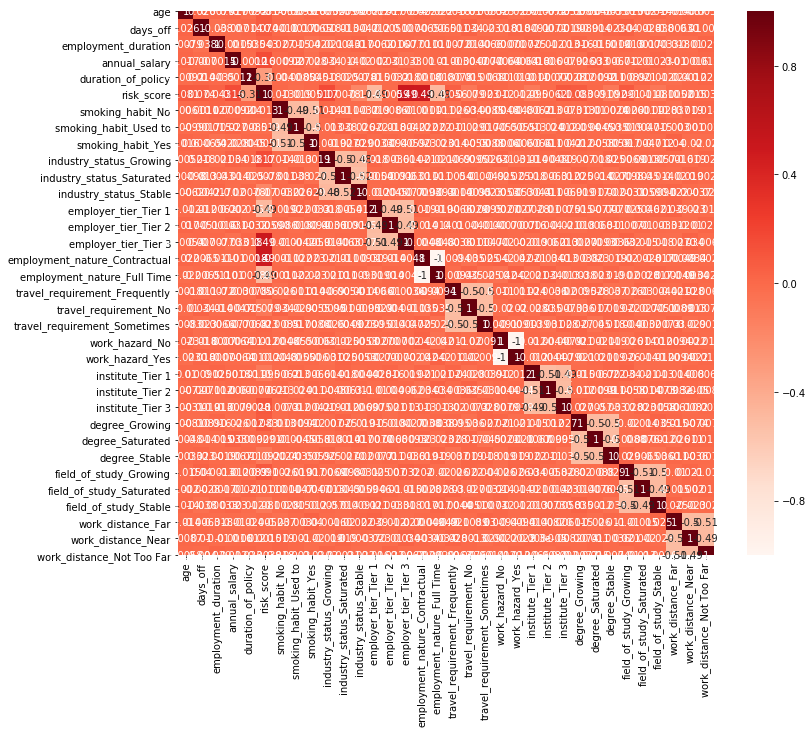

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
cor_target = abs(cor["risk_score"])
relevant_features = cor_target[cor_target>.1]
relevant_features

annual_salary                    0.159004
duration_of_policy               0.310184
risk_score                       1.000000
industry_status_Growing          0.168481
industry_status_Stable           0.174930
employer_tier_Tier 1             0.487622
employer_tier_Tier 3             0.493345
employment_nature_Contractual    0.488743
employment_nature_Full Time      0.488743
institute_Tier 3                 0.101508
Name: risk_score, dtype: float64